# Regression Classifiers Comparison

## Import Library

In [1]:
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, ElasticNet, LassoLars, TweedieRegressor
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.svm import LinearSVR, SVR
from sklearn.cross_decomposition import PLSRegression
from sklearn.neural_network import MLPRegressor

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

## Prepocessing Data

In [2]:
df = pd.read_excel("data.xlsx")
df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,y
0,63,95,61,59,83,62,60,64,56,90,18178
1,100,85,71,85,64,94,97,65,98,66,118804
2,81,50,80,100,67,78,62,79,54,73,51562
3,92,86,50,87,52,98,99,75,83,95,90026
4,60,55,70,77,75,77,97,89,91,52,23908


In [3]:
scaler = MinMaxScaler()
df_scaler = scaler.fit_transform(df)
df_scaler = pd.DataFrame(df_scaler, columns=df.columns)
df_scaler.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,y
0,0.26,0.90,0.22,0.18,0.66,0.24,0.20,0.28,0.12,0.80,0.096452
1,1.00,0.70,0.42,0.70,0.28,0.88,0.94,0.30,0.96,0.32,0.991805
2,0.62,0.00,0.60,1.00,0.34,0.56,0.24,0.58,0.08,0.46,0.393497
3,0.84,0.72,0.00,0.74,0.04,0.96,0.98,0.50,0.66,0.90,0.735743
4,0.20,0.10,0.40,0.54,0.50,0.54,0.94,0.78,0.82,0.04,0.147437


## Spliting Data

In [4]:
X = df_scaler.iloc[:,:-1]
y = df_scaler.iloc[:,-1]
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

### 1. Linear Regression

Mean Absolute Error (MAE) 		: 0.0513
Mean Absolute Percentage Error (MAPE) 	: 0.3713
Root Mean Squared Error (RMSE) 		: 0.0593
Coefficient of Determination (R2) 	: 0.9419


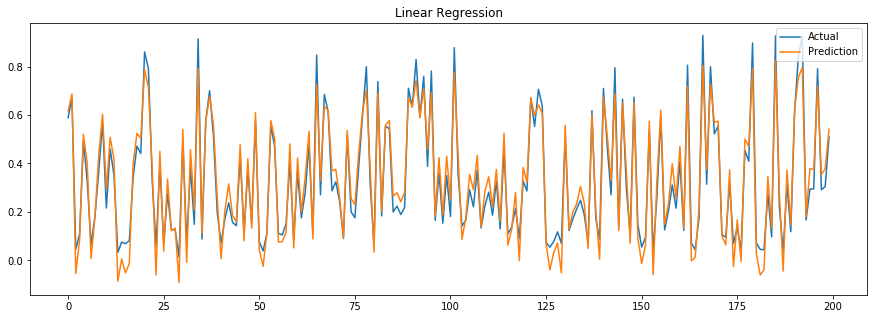

In [5]:
model_linreg = LinearRegression()
model_linreg.fit(X_train, y_train)
y_pred_linreg = model_linreg.predict(X_valid)


print("Mean Absolute Error (MAE) \t\t: %.4f" % 
      mean_absolute_error(y_valid, y_pred_linreg))

print("Mean Absolute Percentage Error (MAPE) \t: %.4f" %
      mean_absolute_percentage_error(y_valid, y_pred_linreg))

print("Root Mean Squared Error (RMSE) \t\t: %.4f" %
      mean_squared_error(y_valid, y_pred_linreg, squared=False))

print("Coefficient of Determination (R2) \t: %.4f" %
      r2_score(y_valid, y_pred_linreg))

plt.figure(figsize=(15,5))
x = range(0, len(y_valid))
plt.plot(x, y_valid, label="Actual")
plt.plot(x, y_pred_linreg, label="Prediction")
plt.title("Linear Regression")
plt.legend(loc="upper right")
plt.show()

### 2. Linear Regression with Polynomial Features

Mean Absolute Error (MAE) 		: 0.0092
Mean Absolute Percentage Error (MAPE) 	: 0.0604
Root Mean Squared Error (RMSE) 		: 0.0109
Coefficient of Determination (R2) 	: 0.9980


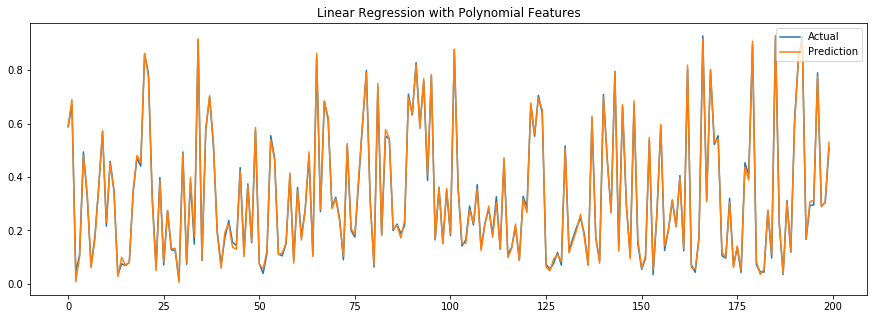

In [6]:
model_linreg_pf = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression())])
model_linreg_pf.fit(X_train, y_train)
y_pred_linreg_pf = model_linreg_pf.predict(X_valid)


print("Mean Absolute Error (MAE) \t\t: %.4f" % 
      mean_absolute_error(y_valid, y_pred_linreg_pf))

print("Mean Absolute Percentage Error (MAPE) \t: %.4f" %
      mean_absolute_percentage_error(y_valid, y_pred_linreg_pf))

print("Root Mean Squared Error (RMSE) \t\t: %.4f" %
      mean_squared_error(y_valid, y_pred_linreg_pf, squared=False))

print("Coefficient of Determination (R2) \t: %.4f" %
      r2_score(y_valid, y_pred_linreg_pf))

plt.figure(figsize=(15,5))
x = range(0, len(y_valid))
plt.plot(x, y_valid, label="Actual")
plt.plot(x, y_pred_linreg_pf, label="Prediction")
plt.title("Linear Regression with Polynomial Features")
plt.legend(loc="upper right")
plt.show()

### 3. Stochastic Gradient Descent

Mean Absolute Error (MAE) 		: 0.0490
Mean Absolute Percentage Error (MAPE) 	: 0.3172
Root Mean Squared Error (RMSE) 		: 0.0583
Coefficient of Determination (R2) 	: 0.9438


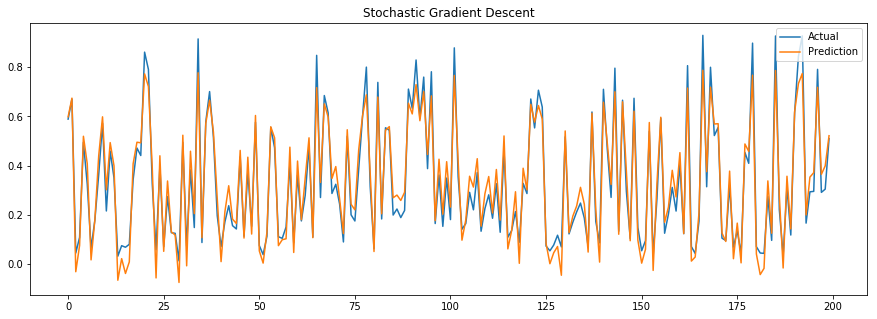

In [7]:
model_sgd = SGDRegressor(tol=0.0001, n_iter_no_change=50, random_state=0)
model_sgd.fit(X_train, y_train)
y_pred_sgd = model_sgd.predict(X_valid)


print("Mean Absolute Error (MAE) \t\t: %.4f" % 
      mean_absolute_error(y_valid, y_pred_sgd))

print("Mean Absolute Percentage Error (MAPE) \t: %.4f" %
      mean_absolute_percentage_error(y_valid, y_pred_sgd))

print("Root Mean Squared Error (RMSE) \t\t: %.4f" %
      mean_squared_error(y_valid, y_pred_sgd, squared=False))

print("Coefficient of Determination (R2) \t: %.4f" %
      r2_score(y_valid, y_pred_sgd))

plt.figure(figsize=(15,5))
x = range(0, len(y_valid))
plt.plot(x, y_valid, label="Actual")
plt.plot(x, y_pred_sgd, label="Prediction")
plt.title("Stochastic Gradient Descent")
plt.legend(loc="upper right")
plt.show()

### 4. Ridge Regression

Mean Absolute Error (MAE) 		: 0.0509
Mean Absolute Percentage Error (MAPE) 	: 0.3546
Root Mean Squared Error (RMSE) 		: 0.0590
Coefficient of Determination (R2) 	: 0.9425


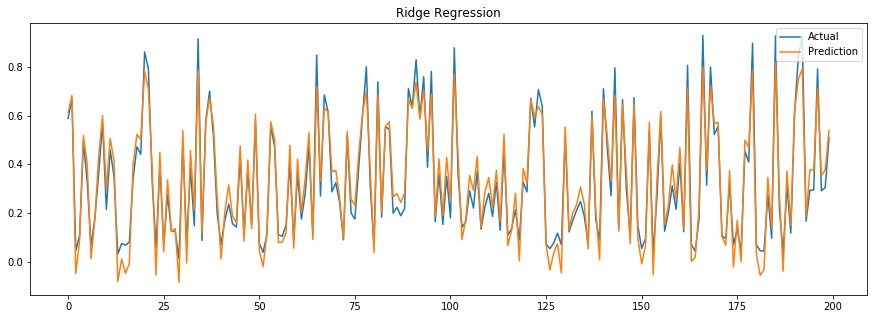

In [8]:
model_ridge = Ridge(alpha=1)
model_ridge.fit(X_train, y_train)
y_pred_ridge = model_ridge.predict(X_valid)


print("Mean Absolute Error (MAE) \t\t: %.4f" % 
      mean_absolute_error(y_valid, y_pred_ridge))

print("Mean Absolute Percentage Error (MAPE) \t: %.4f" %
      mean_absolute_percentage_error(y_valid, y_pred_ridge))

print("Root Mean Squared Error (RMSE) \t\t: %.4f" %
      mean_squared_error(y_valid, y_pred_ridge, squared=False))

print("Coefficient of Determination (R2) \t: %.4f" %
      r2_score(y_valid, y_pred_ridge))

plt.figure(figsize=(15,5))
x = range(0, len(y_valid))
plt.plot(x, y_valid, label="Actual")
plt.plot(x, y_pred_ridge, label="Prediction")
plt.title("Ridge Regression")
plt.legend(loc="upper right")
plt.show()

### 5. Elastic-Net

Mean Absolute Error (MAE) 		: 0.0509
Mean Absolute Percentage Error (MAPE) 	: 0.3570
Root Mean Squared Error (RMSE) 		: 0.0590
Coefficient of Determination (R2) 	: 0.9424


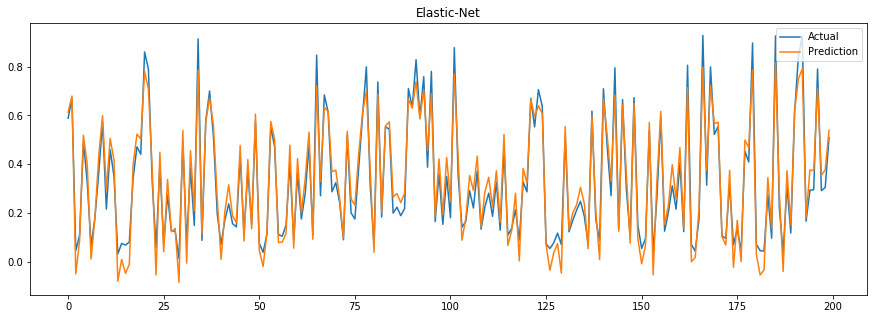

In [9]:
model_elnet = ElasticNet(alpha=0.001, l1_ratio=0.1)
model_elnet.fit(X_train, y_train)
y_pred_elnet = model_elnet.predict(X_valid)


print("Mean Absolute Error (MAE) \t\t: %.4f" % 
      mean_absolute_error(y_valid, y_pred_elnet))

print("Mean Absolute Percentage Error (MAPE) \t: %.4f" %
      mean_absolute_percentage_error(y_valid, y_pred_elnet))

print("Root Mean Squared Error (RMSE) \t\t: %.4f" %
      mean_squared_error(y_valid, y_pred_elnet, squared=False))

print("Coefficient of Determination (R2) \t: %.4f" %
      r2_score(y_valid, y_pred_elnet))

plt.figure(figsize=(15,5))
x = range(0, len(y_valid))
plt.plot(x, y_valid, label="Actual")
plt.plot(x, y_pred_elnet, label="Prediction")
plt.title("Elastic-Net")
plt.legend(loc="upper right")
plt.show()

### 6. LARS Lasso

Mean Absolute Error (MAE) 		: 0.0513
Mean Absolute Percentage Error (MAPE) 	: 0.3691
Root Mean Squared Error (RMSE) 		: 0.0593
Coefficient of Determination (R2) 	: 0.9419


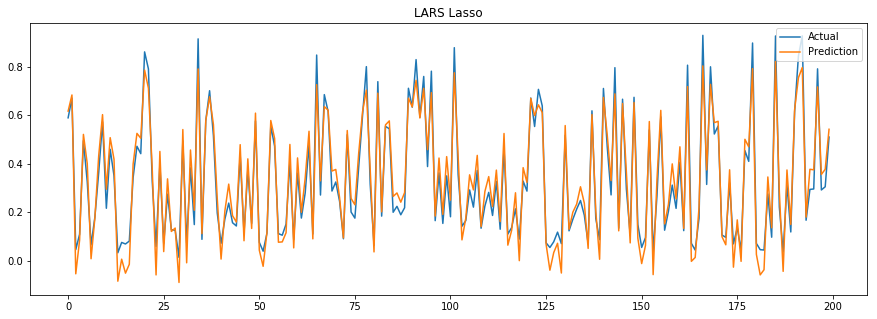

In [10]:
model_lasso = LassoLars(alpha=0.0001, normalize=False)
model_lasso.fit(X_train, y_train)
y_pred_lasso = model_lasso.predict(X_valid)


print("Mean Absolute Error (MAE) \t\t: %.4f" % 
      mean_absolute_error(y_valid, y_pred_lasso))

print("Mean Absolute Percentage Error (MAPE) \t: %.4f" %
      mean_absolute_percentage_error(y_valid, y_pred_lasso))

print("Root Mean Squared Error (RMSE) \t\t: %.4f" %
      mean_squared_error(y_valid, y_pred_lasso, squared=False))

print("Coefficient of Determination (R2) \t: %.4f" %
      r2_score(y_valid, y_pred_lasso))

plt.figure(figsize=(15,5))
x = range(0, len(y_valid))
plt.plot(x, y_valid, label="Actual")
plt.plot(x, y_pred_lasso, label="Prediction")
plt.title("LARS Lasso")
plt.legend(loc="upper right")
plt.show()

### 7. Generalized Linear Regression

Mean Absolute Error (MAE) 		: 0.0233
Mean Absolute Percentage Error (MAPE) 	: 0.1811
Root Mean Squared Error (RMSE) 		: 0.0297
Coefficient of Determination (R2) 	: 0.9854


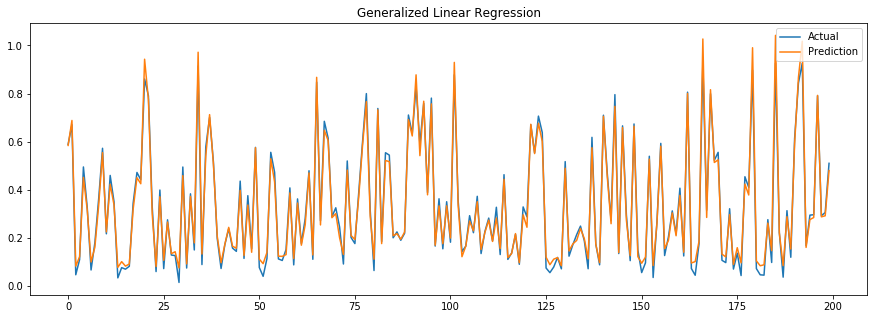

In [11]:
model_glreg = TweedieRegressor(alpha=0.001, power=1)
model_glreg.fit(X_train, y_train)
y_pred_glreg = model_glreg.predict(X_valid)


print("Mean Absolute Error (MAE) \t\t: %.4f" % 
      mean_absolute_error(y_valid, y_pred_glreg))

print("Mean Absolute Percentage Error (MAPE) \t: %.4f" %
      mean_absolute_percentage_error(y_valid, y_pred_glreg))

print("Root Mean Squared Error (RMSE) \t\t: %.4f" %
      mean_squared_error(y_valid, y_pred_glreg, squared=False))

print("Coefficient of Determination (R2) \t: %.4f" %
      r2_score(y_valid, y_pred_glreg))

plt.figure(figsize=(15,5))
x = range(0, len(y_valid))
plt.plot(x, y_valid, label="Actual")
plt.plot(x, y_pred_glreg, label="Prediction")
plt.title("Generalized Linear Regression")
plt.legend(loc="upper right")
plt.show()

### 8. K-Nearest Neigbors Regression

Mean Absolute Error (MAE) 		: 0.0750
Mean Absolute Percentage Error (MAPE) 	: 0.4598
Root Mean Squared Error (RMSE) 		: 0.0961
Coefficient of Determination (R2) 	: 0.8474


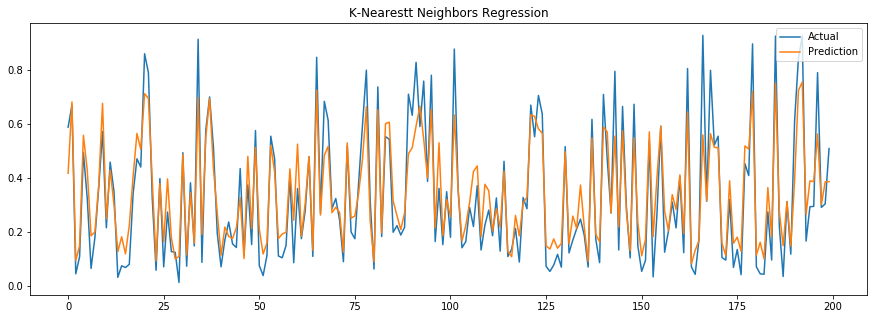

In [25]:
model_kneg = KNeighborsRegressor(n_neighbors=9, weights="distance", p=1, leaf_size=50)
model_kneg.fit(X_train, y_train)
y_pred_kneg = model_kneg.predict(X_valid)


print("Mean Absolute Error (MAE) \t\t: %.4f" % 
      mean_absolute_error(y_valid, y_pred_kneg))

print("Mean Absolute Percentage Error (MAPE) \t: %.4f" %
      mean_absolute_percentage_error(y_valid, y_pred_kneg))

print("Root Mean Squared Error (RMSE) \t\t: %.4f" %
      mean_squared_error(y_valid, y_pred_kneg, squared=False))

print("Coefficient of Determination (R2) \t: %.4f" %
      r2_score(y_valid, y_pred_kneg))

plt.figure(figsize=(15,5))
x = range(0, len(y_valid))
plt.plot(x, y_valid, label="Actual")
plt.plot(x, y_pred_kneg, label="Prediction")
plt.title("K-Nearestt Neighbors Regression")
plt.legend(loc="upper right")
plt.show()

### 9. Radius Neighbors Regression

Mean Absolute Error (MAE) 		: 0.0916
Mean Absolute Percentage Error (MAPE) 	: 0.5858
Root Mean Squared Error (RMSE) 		: 0.1105
Coefficient of Determination (R2) 	: 0.7982


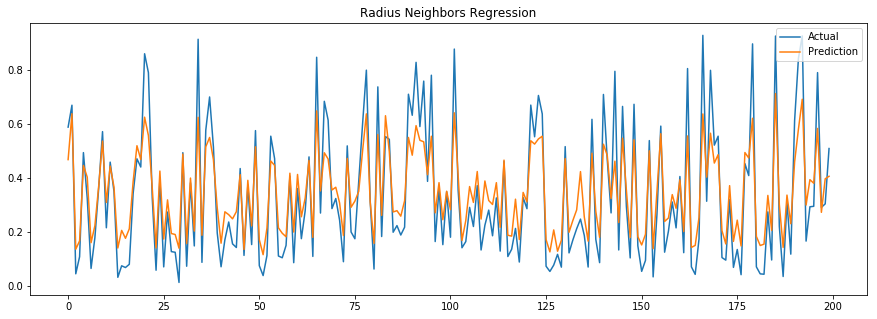

In [13]:
model_rneg = RadiusNeighborsRegressor(radius=0.9, weights="distance")
model_rneg.fit(X_train, y_train)
y_pred_rneg = model_rneg.predict(X_valid)


print("Mean Absolute Error (MAE) \t\t: %.4f" % 
      mean_absolute_error(y_valid, y_pred_rneg))

print("Mean Absolute Percentage Error (MAPE) \t: %.4f" %
      mean_absolute_percentage_error(y_valid, y_pred_rneg))

print("Root Mean Squared Error (RMSE) \t\t: %.4f" %
      mean_squared_error(y_valid, y_pred_rneg, squared=False))

print("Coefficient of Determination (R2) \t: %.4f" %
      r2_score(y_valid, y_pred_rneg))

plt.figure(figsize=(15,5))
x = range(0, len(y_valid))
plt.plot(x, y_valid, label="Actual")
plt.plot(x, y_pred_rneg, label="Prediction")
plt.title("Radius Neighbors Regression")
plt.legend(loc="upper right")
plt.show()

### 10. Decision Tree Regression

Mean Absolute Error (MAE) 		: 0.0243
Mean Absolute Percentage Error (MAPE) 	: 0.1410
Root Mean Squared Error (RMSE) 		: 0.0304
Coefficient of Determination (R2) 	: 0.9847


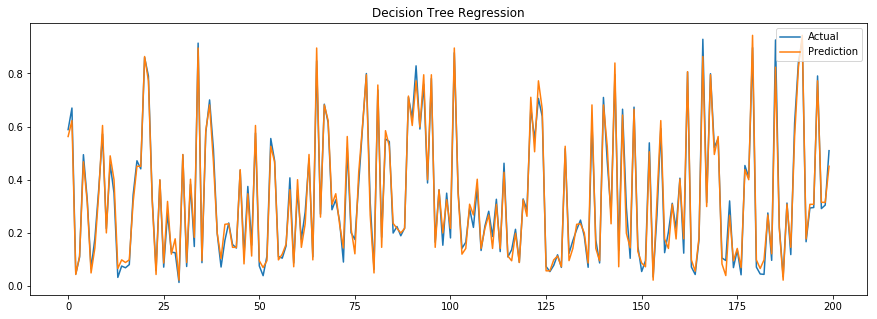

In [14]:
model_detree = DecisionTreeRegressor(min_samples_leaf=7, random_state=4)
model_detree.fit(X_train, y_train)
y_pred_detree = model_detree.predict(X_valid)


print("Mean Absolute Error (MAE) \t\t: %.4f" % 
      mean_absolute_error(y_valid, y_pred_detree))

print("Mean Absolute Percentage Error (MAPE) \t: %.4f" %
      mean_absolute_percentage_error(y_valid, y_pred_detree))

print("Root Mean Squared Error (RMSE) \t\t: %.4f" %
      mean_squared_error(y_valid, y_pred_detree, squared=False))

print("Coefficient of Determination (R2) \t: %.4f" %
      r2_score(y_valid, y_pred_detree))

plt.figure(figsize=(15,5))
x = range(0, len(y_valid))
plt.plot(x, y_valid, label="Actual")
plt.plot(x, y_pred_detree, label="Prediction")
plt.title("Decision Tree Regression")
plt.legend(loc="upper right")
plt.show()

### 11. Extra Tree Regression

Mean Absolute Error (MAE) 		: 0.0247
Mean Absolute Percentage Error (MAPE) 	: 0.1533
Root Mean Squared Error (RMSE) 		: 0.0306
Coefficient of Determination (R2) 	: 0.9846


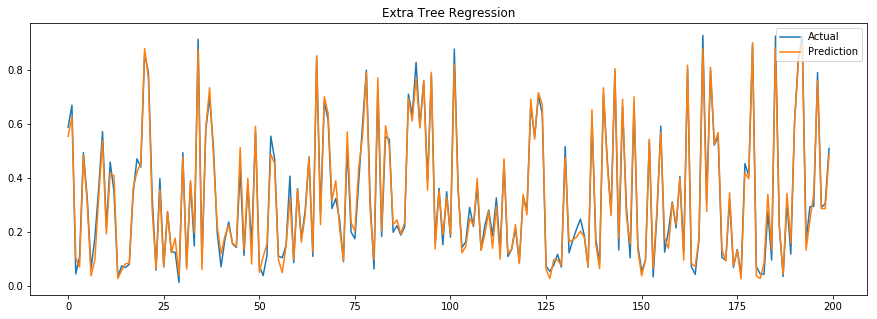

In [15]:
model_extree = ExtraTreeRegressor(min_samples_leaf=2, random_state=42)
model_extree.fit(X_train, y_train)
y_pred_extree = model_extree.predict(X_valid)


print("Mean Absolute Error (MAE) \t\t: %.4f" % 
      mean_absolute_error(y_valid, y_pred_extree))

print("Mean Absolute Percentage Error (MAPE) \t: %.4f" %
      mean_absolute_percentage_error(y_valid, y_pred_extree))

print("Root Mean Squared Error (RMSE) \t\t: %.4f" %
      mean_squared_error(y_valid, y_pred_extree, squared=False))

print("Coefficient of Determination (R2) \t: %.4f" %
      r2_score(y_valid, y_pred_extree))

plt.figure(figsize=(15,5))
x = range(0, len(y_valid))
plt.plot(x, y_valid, label="Actual")
plt.plot(x, y_pred_extree, label="Prediction")
plt.title("Extra Tree Regression")
plt.legend(loc="upper right")
plt.show()

### 12. Linear Support Vector Regression

Mean Absolute Error (MAE) 		: 0.0490
Mean Absolute Percentage Error (MAPE) 	: 0.3584
Root Mean Squared Error (RMSE) 		: 0.0600
Coefficient of Determination (R2) 	: 0.9406


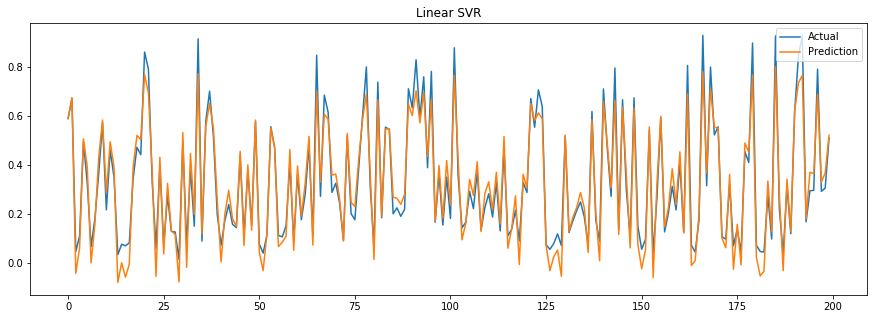

In [16]:
model_linsvr = LinearSVR(max_iter=4000, random_state=42)
model_linsvr.fit(X_train, y_train)
y_pred_linsvr = model_linsvr.predict(X_valid)


print("Mean Absolute Error (MAE) \t\t: %.4f" % 
      mean_absolute_error(y_valid, y_pred_linsvr))

print("Mean Absolute Percentage Error (MAPE) \t: %.4f" %
      mean_absolute_percentage_error(y_valid, y_pred_linsvr))

print("Root Mean Squared Error (RMSE) \t\t: %.4f" %
      mean_squared_error(y_valid, y_pred_linsvr, squared=False))

print("Coefficient of Determination (R2) \t: %.4f" %
      r2_score(y_valid, y_pred_linsvr))

plt.figure(figsize=(15,5))
x = range(0, len(y_valid))
plt.plot(x, y_valid, label="Actual")
plt.plot(x, y_pred_linsvr, label="Prediction")
plt.title("Linear SVR")
plt.legend(loc="upper right")
plt.show()

### 13. Support Vector Regression

Mean Absolute Error (MAE) 		: 0.0244
Mean Absolute Percentage Error (MAPE) 	: 0.1744
Root Mean Squared Error (RMSE) 		: 0.0321
Coefficient of Determination (R2) 	: 0.9829


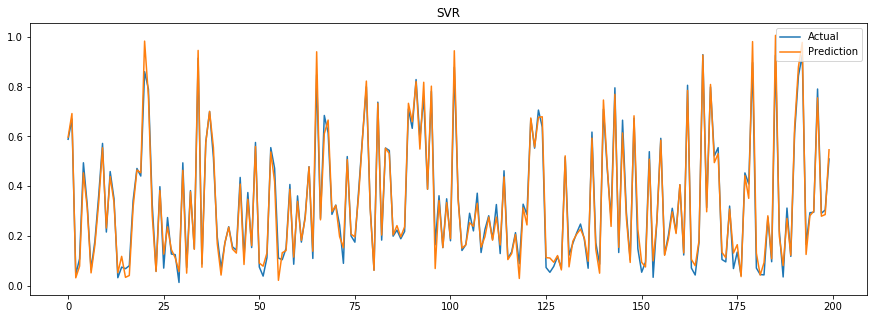

In [17]:
model_svr = SVR(kernel="poly",degree=3, epsilon=0.01)
model_svr.fit(X_train, y_train)
y_pred_svr = model_svr.predict(X_valid)


print("Mean Absolute Error (MAE) \t\t: %.4f" % 
      mean_absolute_error(y_valid, y_pred_svr))

print("Mean Absolute Percentage Error (MAPE) \t: %.4f" %
      mean_absolute_percentage_error(y_valid, y_pred_svr))

print("Root Mean Squared Error (RMSE) \t\t: %.4f" %
      mean_squared_error(y_valid, y_pred_svr, squared=False))

print("Coefficient of Determination (R2) \t: %.4f" %
      r2_score(y_valid, y_pred_svr))

plt.figure(figsize=(15,5))
x = range(0, len(y_valid))
plt.plot(x, y_valid, label="Actual")
plt.plot(x, y_pred_svr, label="Prediction")
plt.title("SVR")
plt.legend(loc="upper right")
plt.show()

### 14. PLS Regression

Mean Absolute Error (MAE) 		: 0.0513
Mean Absolute Percentage Error (MAPE) 	: 0.3711
Root Mean Squared Error (RMSE) 		: 0.0593
Coefficient of Determination (R2) 	: 0.9419


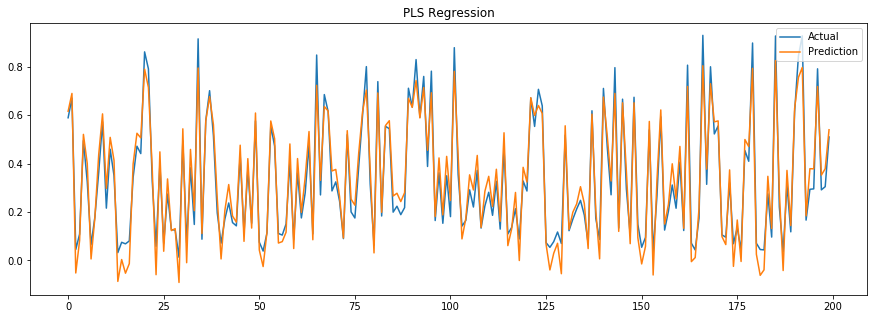

In [18]:
model_plsreg = PLSRegression()
model_plsreg.fit(X_train, y_train)
y_pred_plsreg = model_plsreg.predict(X_valid)


print("Mean Absolute Error (MAE) \t\t: %.4f" % 
      mean_absolute_error(y_valid, y_pred_plsreg))

print("Mean Absolute Percentage Error (MAPE) \t: %.4f" %
      mean_absolute_percentage_error(y_valid, y_pred_plsreg))

print("Root Mean Squared Error (RMSE) \t\t: %.4f" %
      mean_squared_error(y_valid, y_pred_plsreg, squared=False))

print("Coefficient of Determination (R2) \t: %.4f" %
      r2_score(y_valid, y_pred_plsreg))

plt.figure(figsize=(15,5))
x = range(0, len(y_valid))
plt.plot(x, y_valid, label="Actual")
plt.plot(x, y_pred_plsreg, label="Prediction")
plt.title("PLS Regression")
plt.legend(loc="upper right")
plt.show()

### 15. Multi Layer Perceptron Regression

Mean Absolute Error (MAE) 		: 0.0105
Mean Absolute Percentage Error (MAPE) 	: 0.0660
Root Mean Squared Error (RMSE) 		: 0.0131
Coefficient of Determination (R2) 	: 0.9972


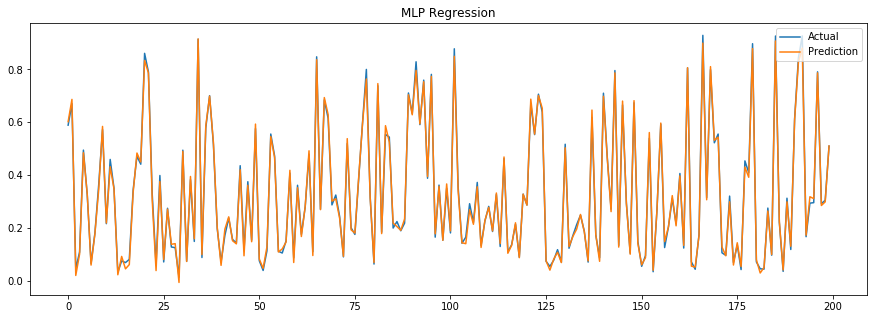

In [19]:
model_mlp = MLPRegressor(hidden_layer_sizes=(1000,), n_iter_no_change=100, max_iter=1000, random_state=42)
model_mlp.fit(X_train, y_train)
y_pred_mlp = model_mlp.predict(X_valid)


print("Mean Absolute Error (MAE) \t\t: %.4f" % 
      mean_absolute_error(y_valid, y_pred_mlp))

print("Mean Absolute Percentage Error (MAPE) \t: %.4f" %
      mean_absolute_percentage_error(y_valid, y_pred_mlp))

print("Root Mean Squared Error (RMSE) \t\t: %.4f" %
      mean_squared_error(y_valid, y_pred_mlp, squared=False))

print("Coefficient of Determination (R2) \t: %.4f" %
      r2_score(y_valid, y_pred_mlp))

plt.figure(figsize=(15,5))
x = range(0, len(y_valid))
plt.plot(x, y_valid, label="Actual")
plt.plot(x, y_pred_mlp, label="Prediction")
plt.title("MLP Regression")
plt.legend(loc="upper right")
plt.show()

## Comparisson

### a. Persiapan Data untuk Visualisasi

In [20]:
model_name = ["Linear Regression", "Linear Reg (Poly)",
              "SGD", "Ridge", "Elastic-Net",
              "LARS Lasso", "GLR", "K-NN",
              "Radius Neighbors", "Decision Tree", "Extra Tree", "Linear SVR", "SVR",
              "PLS", "MLP"]

y_pred = [y_pred_linreg, y_pred_linreg_pf, y_pred_sgd, y_pred_ridge,
          y_pred_elnet, y_pred_lasso, y_pred_glreg, y_pred_kneg, y_pred_rneg,
          y_pred_detree, y_pred_extree, y_pred_linsvr, y_pred_svr, y_pred_plsreg, y_pred_mlp]

mae = list(map(lambda ypred: round(mean_absolute_error(y_valid, ypred), 4), y_pred))
mape = list(map(lambda ypred: round(mean_absolute_percentage_error(y_valid, ypred), 4), y_pred))
rmse = list(map(lambda ypred: round(mean_squared_error(y_valid, ypred, squared=False), 4), y_pred))
r2 = list(map(lambda ypred: round(r2_score(y_valid, ypred), 4), y_pred))

color_mae = list(map(lambda cmae: "b" if cmae==min(mae) else "c", mae))
color_mape = list(map(lambda cmape: "b" if cmape==min(mape) else "c", mape))
color_rmse = list(map(lambda crmse: "b" if crmse==min(rmse) else "c", rmse))
color_r2 = list(map(lambda cr2: "b" if cr2==max(r2) else "c", r2))

### b. Visualisasi

#### Mean Absolute Error (MAE)

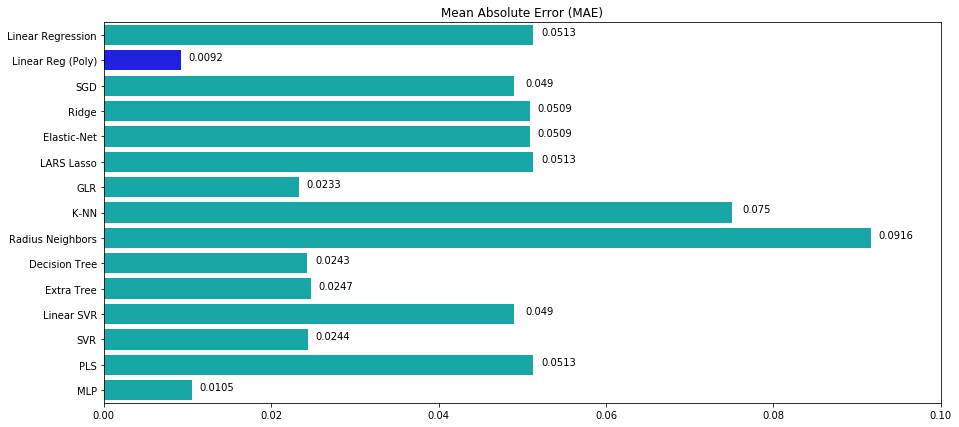

In [21]:
plt.figure(figsize=(15,7))
b = sns.barplot(y=model_name, x=mae, orient="h", palette=color_mae)
for idx, name in enumerate(model_name):
    b.text(y=idx, x=mae[idx]+0.003, s=round(mae[idx],4), color='black', ha="center")
plt.xlim([0,0.1])
plt.title("Mean Absolute Error (MAE)")
plt.show()

#### Mean Absolute Percentage Error (MAPE)

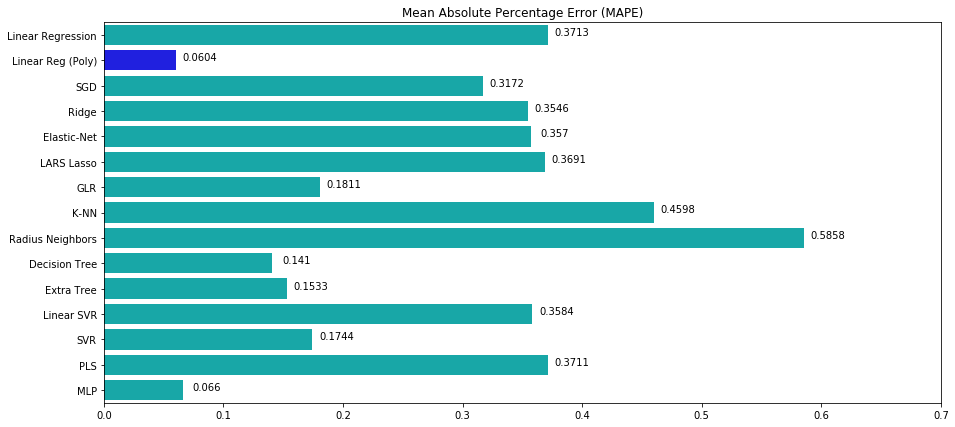

In [22]:
plt.figure(figsize=(15,7))
b = sns.barplot(y=model_name, x=mape, orient="h", palette=color_mape)
for idx, name in enumerate(model_name):
    b.text(y=idx, x=mape[idx]+0.02, s=round(mape[idx],4), color='black', ha="center")
plt.xlim([0,0.7])
plt.title("Mean Absolute Percentage Error (MAPE)")
plt.show()

#### Root Mean Squared Error (RMSE)

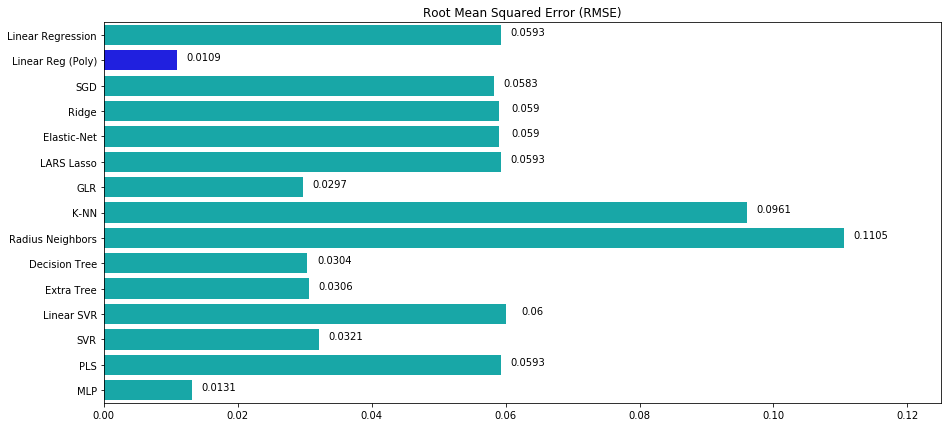

In [23]:
plt.figure(figsize=(15,7))
b = sns.barplot(y=model_name, x=rmse, orient="h", palette=color_rmse)
for idx, name in enumerate(model_name):
    b.text(y=idx, x=rmse[idx]+0.004, s=round(rmse[idx],4), color='black', ha="center")
plt.xlim([0,0.125])
plt.title("Root Mean Squared Error (RMSE)")
plt.show()

#### Coefficient of Determination (R2)

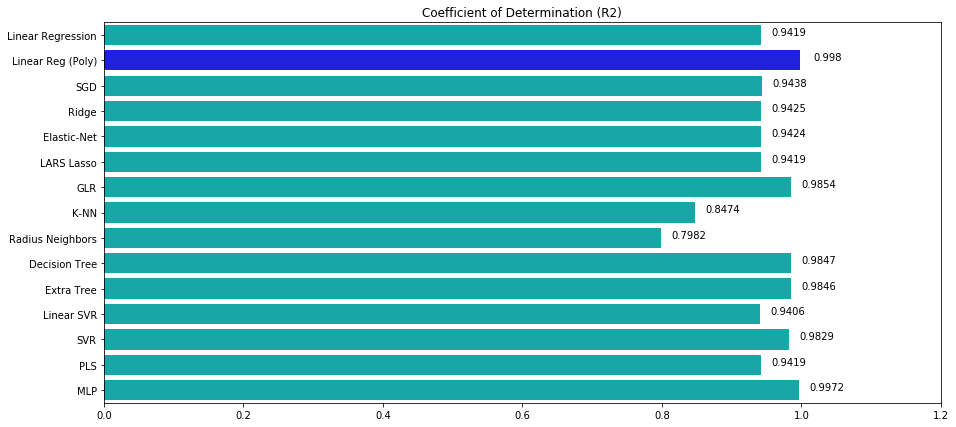

In [24]:
plt.figure(figsize=(15,7))
b = sns.barplot(y=model_name, x=r2, orient="h", palette=color_r2)
for idx, name in enumerate(model_name):
    b.text(y=idx, x=r2[idx]+0.04, s=round(r2[idx],4), color='black', ha="center")
plt.xlim([0,1.2])
plt.title("Coefficient of Determination (R2)")
plt.show()